In [1]:
#1-تتيح لك قدرة التعامل مع المصفوفات بطريقة أفضل من ال Lists الموجودة تلقائيا كشكل من أشكال تراكيب البيانات في البايثون.
import numpy as np
#2-الهدف الأساسي لمكتبة Pandas هو إجراء ما يسمى ب Data Munging، ونقصد بهذا المصطلح إجراء تغييرات على بيانات أساسية غير مرتبة (Raw data) بحيث تقوم عملية التغيير هذه بتحويل البيانات إلى بيانات مفهومة ومفيدة.
import pandas as pd
#3-هي مختصة برسومات 2D، وعلى الرغم من أن هذه المكتبة من أقدم المكتبات المختصة بالإظهار المرئي للبيانات، إلا أنها ما زالت تتربع على عرش المكتبات المُستخدمة في هذا المجال، وتم بناؤها لتكون مُشابهة لدور برنامج Matlab.
import matplotlib.pyplot as plt
#4-can be used for data visualization. In this article we will look at Seaborn which is another extremely useful library for data visualization in Python. 
import seaborn as sns

In [2]:
data=pd.read_csv(r"D:\PYTHON\GITHUB code\done\Analysis New York City Airbnb\AB_NYC_2019.csv")


In [3]:
#عشان حجم الداتا كبيره بنستخدم الفانكشن عشان نقطع جزء من البيانات 
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
#هنملي القيم الناقصه  بصفر مؤقتا 
#هنمسح الكود ده عشان هيسببلنا مشاكل بعد كده هيكون عندي اصفار كتير
#data.fillna(0,inplace=True)
y=data["price"]

In [5]:
#هنشيل الداتا الي عايزين نتوقعهاو عندنا هنا هتكون السعر
data=data.drop("price",axis=1)
x=data

In [6]:
#هنمسح الداتا الي ملهاش لازمه عندنا و هنا كانت 4 
x=x.drop("id",axis=1)
x=x.drop("host_id",axis=1)
x=x.drop("name",axis=1)
x=x.drop("host_name",axis=1)
#هنمسح خطوط الطول و العرض ملهاش لازمه بالنسبه للسعر
x=x.drop(["latitude","longitude"],axis=1)


In [7]:
#هنحول الاسامي بروكلن و منهاتن عباره عن 0و1 عشان نقدر نعمل تحليل
#هنجيب حاجه اسمها دامي فاليوز الي انا مش عارف معناها ايه بالظبطك
df_ngroup=pd.get_dummies(x["neighbourhood_group"])

In [8]:
# طلع حوار صايع فشخ هندنا في العمود ده 5 مناطق ف لفو الكمبيوتر ادي لكل واحد فيهم صيغ 
#من 1لحد 5 ممكن الكمبيوتر يعمل عمليات منطقيه عليهم مثلا 1 اصغر من 5 ةهكذا لذالك ادا المنطقه الموجوده في العمود 1 و بقيه المناطق اداهم صفر
#عايزين نربط الداتا ببعض هنستخدم فانكشن  اول مره نستخدمها من مكتبه panda 
#الفانكشن دي بتدمج الصفوف الي طلعت من الفانكشن الي قبلها مع بقيه الداتا
x=pd.concat([x,df_ngroup],axis=1)

In [9]:
#هنمسح الصف ده لانه ملهوش لازمه دلوقتي اتحول 0 و 1 خلاص
x=x.drop("neighbourhood_group",axis=1)

In [10]:
#هنبدا شغل علي العرف 
df_room=pd.get_dummies(x["room_type"])
#هنحول ل 0و1
x=pd.concat([x,df_room],axis=1)

In [11]:
#هنمسح الغرف عشان حولناها
x=x.drop("room_type",axis=1)

In [12]:
#هنعمل مع نوع الجار الي عملناه مع كل الي فات
#df_ni=pd.get_dummies(x["neighbourhood"])

#x=pd.concat([x,df_ni],axis=1)

x=x.drop("neighbourhood",axis=1)


In [13]:
#هنشيل الجيران عشان عددهم 221 نوع و هتصعب التحليل عليا جدا لذالك نفضل نشيلها
#هنشوف موجود كام ىشى في الداتا
x.isna().sum
#هنبدا نعوض الداتا الناقصه

<bound method DataFrame.sum of        minimum_nights  number_of_reviews  last_review  reviews_per_month  \
0               False              False        False              False   
1               False              False        False              False   
2               False              False         True               True   
3               False              False        False              False   
4               False              False        False              False   
5               False              False        False              False   
6               False              False        False              False   
7               False              False        False              False   
8               False              False        False              False   
9               False              False        False              False   
10              False              False        False              False   
11              False              False        False    

In [14]:
#هنستخدم المتوسط لملء الداتا 
x["reviews_per_month"].fillna(x["reviews_per_month"].mean(),inplace=True)

In [15]:
#هيغير الداتا باقرب حاجه عندها

x["last_review"].fillna(method="ffill",inplace=True)


In [16]:
#همسح معاد اخر تقيم لعدم اهميه القصوي بس ممكن نستخدمهم عادي
x=x.drop("last_review",axis=1)

In [17]:
#هستدعي الملفات تاني عشان تبقي الداتا بيور و عشان الغي الاصفار و الوحايد الكتير الي ضفتهم 
data_new=pd.read_csv(r"D:\PYTHON\GITHUB code\done\Analysis New York City Airbnb\AB_NYC_2019.csv")


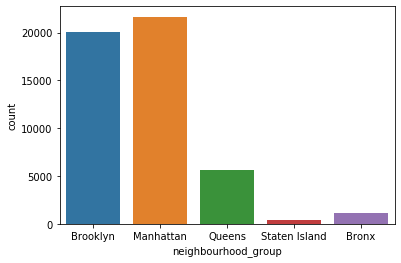

In [18]:
#هنحاول نطلع علاقات بين البيانات 
x2=sns.countplot(x="neighbourhood_group",data=data_new)

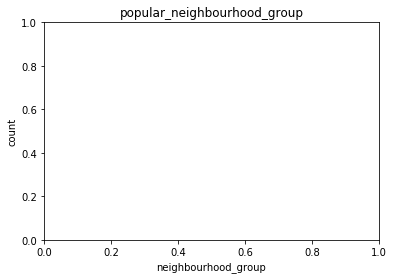

In [26]:
#هحط عنوان للداتا ككل
plt.title("popular_neighbourhood_group")
#هنحط  عنوان للx
plt.xlabel("neighbourhood_group")
#هنحط  عنوانy

plt.ylabel("count")
#هعرض الداتا بتاعتي
plt.show()

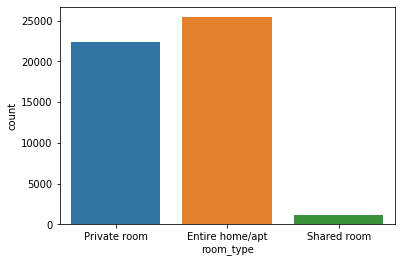

In [23]:
#هنحاول نطلع علاقات بين البيانات من نفس النوع 
###########هنا بنعمل كل ده عشان الرسمه سواء المحاور او اسم الرسمه و ما يخصها
#لازم لازم نعمل بيانات الرسمه عشان نقدر نطلع علاقات 
x1=sns.countplot(x="room_type",data=data_new)

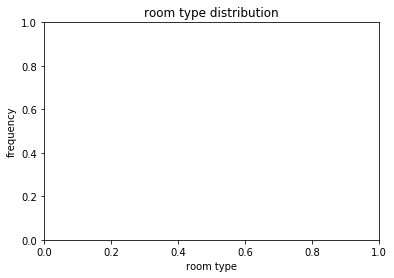

In [25]:
plt.title("room type distribution")
#هنحط  عنوان للx

plt.xlabel("room type")
#هنحط  عنوانy

plt.ylabel("frequency")
#هعرض الداتا بتاعتي

plt.show()

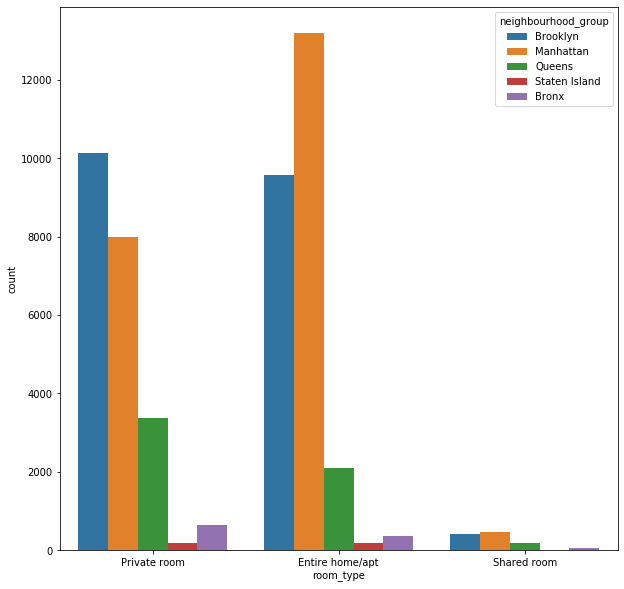

In [27]:
#هنبدا نطلع علاقات بين الداتا ما بين كل داتا علي حده 
#حجم الرسمه بتاعتي
plt.figure(figsize=(10,10))
#hue  مشش فاهم قصده كويسالي في اخر الكود يعتبر الاساس
x1=sns.countplot(x="room_type",data=data_new,hue="neighbourhood_group")

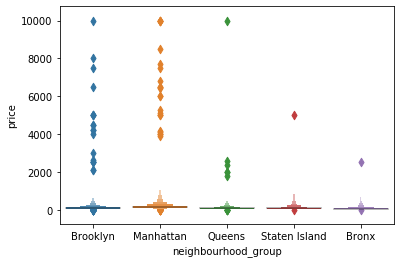

In [28]:
# الموجودين عنديout liers بتحددلي 
#Xالاساس و Y الفرعي
sns.boxenplot(x="neighbourhood_group",y="price",data=data_new)

In [29]:
#بعد الرن هيطلع كل الي فوق out liers و الي تحت متصلين
#هنعمل داتا جديده نتخلص فيها من الداتا الزياده في السعر
data_price=data_new[data_new["price"]<=400]

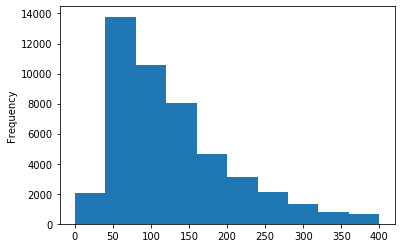

In [30]:
#عايزين نعرض الداتا بس في شكل هيستوجرام
data_price.price.plot(kind="hist")

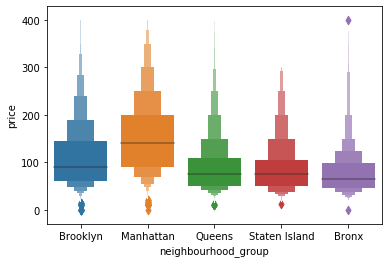

In [31]:
#علاقه جديده
# رينج الاسعار الاكثر تكرارا
#هتساعدني في حجات كتير جدا لانها ممثله بيانيا
sns.boxenplot(x="neighbourhood_group",y="price",data=data_price)


In [32]:
#هنعمل حاجه جديده
plt.figure(figsize=(10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

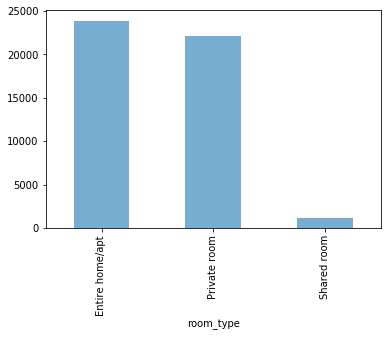

In [33]:
#هجيب نسبه اليفيو بالنسبه للغرف 3 انواع 
data_price.groupby(["room_type"]).count()["number_of_reviews"].plot(kind="bar",alpha=.6)


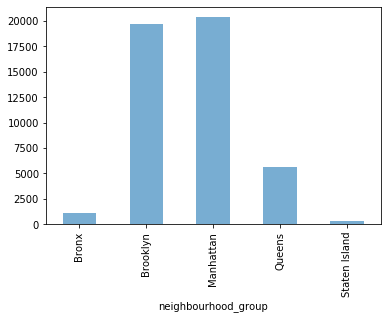

In [34]:
#هنعمله بالنسبه للمناطق
data_price.groupby(["neighbourhood_group"]).count()["number_of_reviews"].plot(kind="bar",alpha=.6)
